In [2]:
!pip3 install auto-ts
!pip install dask distributed --upgrade
from auto_ts import auto_timeseries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

Imported auto_timeseries version:0.0.64. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')



In [3]:
train_df = pd.read_csv("https://raw.githubusercontent.com/mgovindasamy/auto-ts-tutorial/main/Train.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/mgovindasamy/auto-ts-tutorial/main/Test.csv")

In [4]:
train_df.head()

,Date,Sales
0,2012-08-25 00:00:00,1.78
1,2012-08-26 00:00:00,1.91
2,2012-08-27 00:00:00,1.61
3,2012-08-28 00:00:00,1.55
4,2012-08-29 00:00:00,1.58


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433 entries, 0 to 432
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    433 non-null    object 
 1   Sales   433 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.9+ KB


In [6]:
train_df.set_index("Date", inplace=True)
test_df.set_index("Date", inplace=True)

In [7]:
train_df.head()

,Sales
Date,
2012-08-25 00:00:00,1.78
2012-08-26 00:00:00,1.91
2012-08-27 00:00:00,1.61
2012-08-28 00:00:00,1.55
2012-08-29 00:00:00,1.58


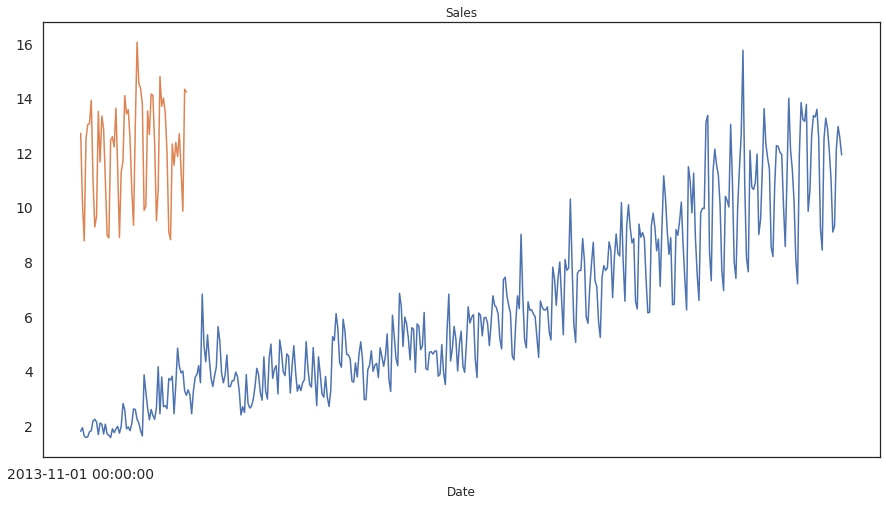

In [8]:
train_df.Sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)
test_df.Sales.plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()

In [9]:
model = auto_timeseries(forecast_period=61,
                        score_type='rmse', time_interval='D',
                        model_type='best')

In [10]:
train_df.reset_index(inplace=True)

In [11]:
train_df.head()

,Date,Sales
0,2012-08-25 00:00:00,1.78
1,2012-08-26 00:00:00,1.91
2,2012-08-27 00:00:00,1.61
3,2012-08-28 00:00:00,1.55
4,2012-08-29 00:00:00,1.58


Start of Fit.....
    Target variable given as = Sales
Start of loading of data.....
    Inputs: ts_column = Date, sep = ,, target = ['Sales']
    Using given input: pandas dataframe...
    Date column exists in given train data...
    train data shape = (433, 1)
    detected strf_time_format as %Y-%m-%d %H:%M:%S in train data. You can change it in setup if this is incorrect.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model
No time series plot since verbose = 0. Continuing
Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> 

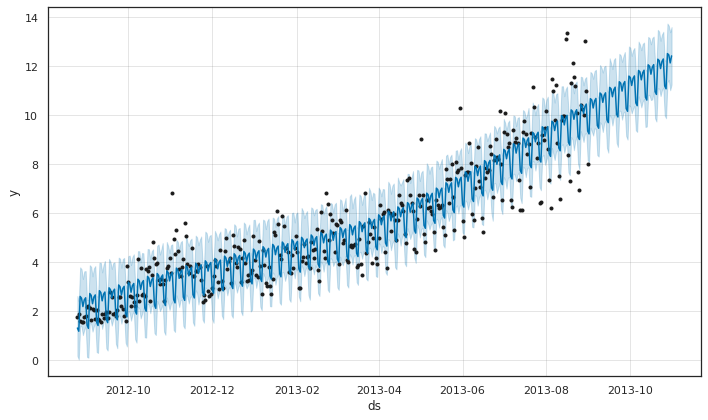

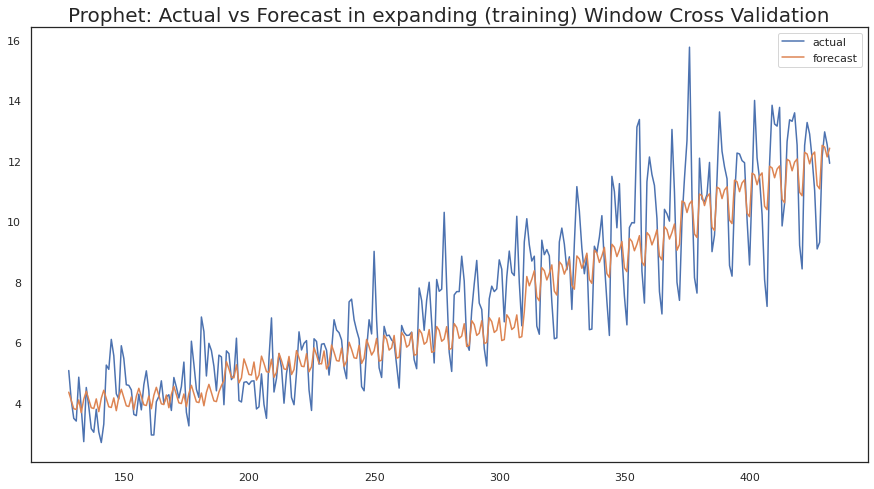

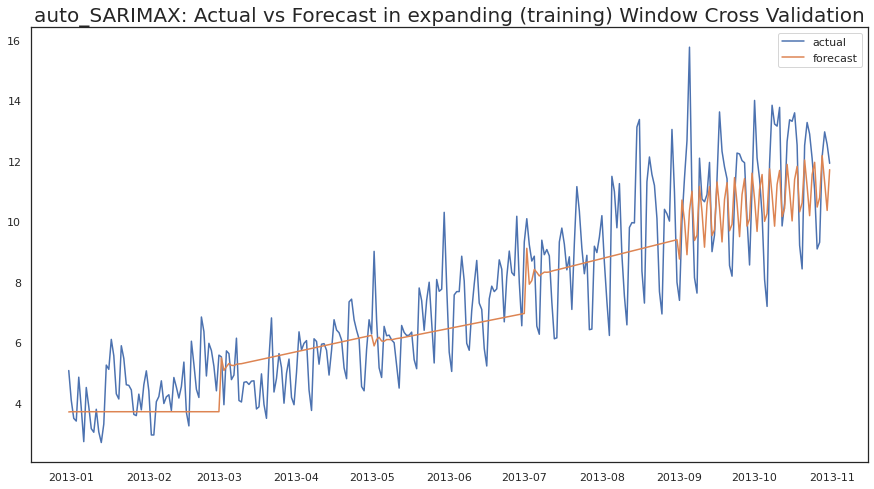

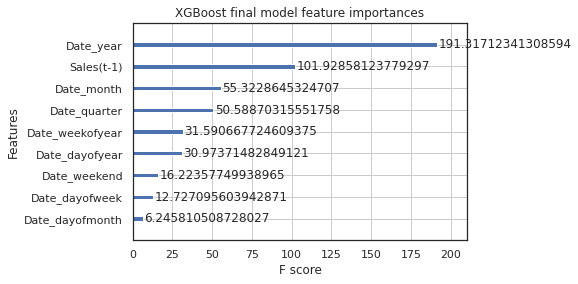

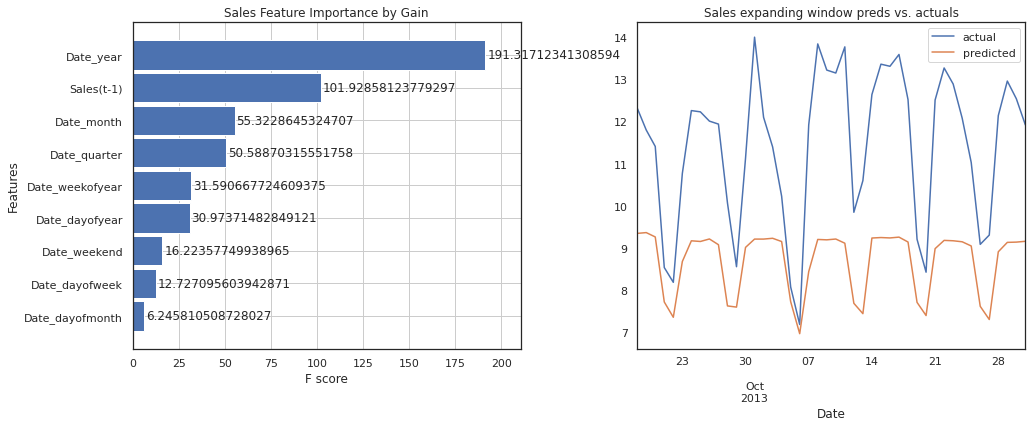

In [12]:
model.fit(traindata= train_df, 
          ts_column="Date",
          target="Sales")

In [13]:
future_predictions = model.predict(testdata=61)

Predicting using forecast period=61 as input for Prophet model
Building Forecast dataframe. Forecast Period = 61


In [14]:
test_df.reset_index(inplace=True)

In [15]:
test_df["Prophet Predictions"] = future_predictions["yhat"].values

In [16]:
test_df.head()

,Date,Sales,Prophet Predictions
0,2013-11-01 00:00:00,12.711543,12.608843
1,2013-11-02 00:00:00,10.152996,11.297466
2,2013-11-03 00:00:00,8.765463,11.126475
3,2013-11-04 00:00:00,12.506665,12.807634
4,2013-11-05 00:00:00,13.028814,12.934201


In [17]:
test_df.set_index("Date", inplace=True)

In [18]:
test_df.head(3)

,Sales,Prophet Predictions
Date,,
2013-11-01 00:00:00,12.711543,12.608843
2013-11-02 00:00:00,10.152996,11.297466
2013-11-03 00:00:00,8.765463,11.126475


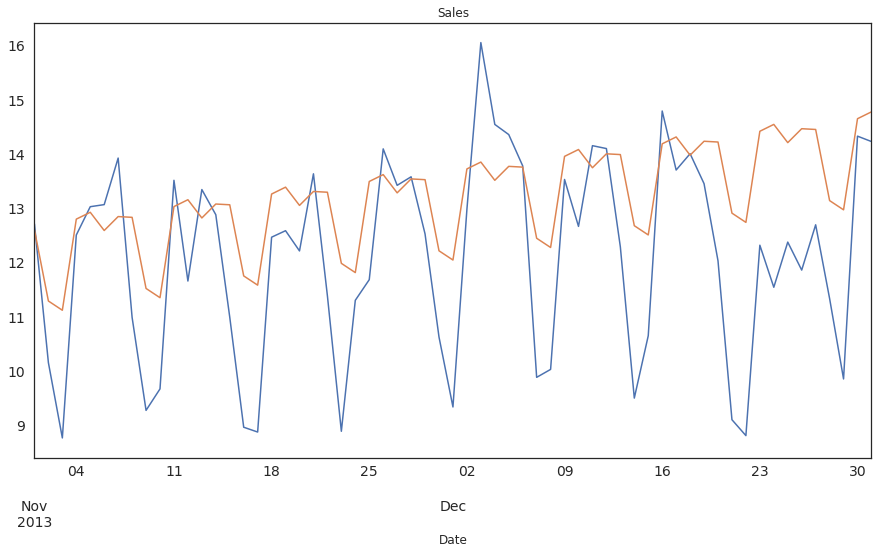

In [ ]:
test_df["Sales"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
test_df["Prophet Predictions"].plot(figsize=(15,8), title= 'Sales', fontsize=14)
plt.show()